# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('df_tratado.csv')

In [4]:
df.dtypes

Unnamed: 0                                  int64
sexo_F                                      int64
posse_de_veiculo                            int64
posse_de_imovel                             int64
qtd_filhos                                  int64
idade                                     float64
tempo_emprego                             float64
possui_celular                              int64
possui_fone_comercial                       int64
possui_fone                                 int64
possui_email                                int64
qt_pessoas_residencia                     float64
mau                                          bool
tipo_renda_Pensioner                        int64
tipo_renda_State servant                    int64
tipo_renda_Student                          int64
tipo_renda_Working                          int64
educacao_Higher education                   int64
educacao_Incomplete higher                  int64
educacao_Lower secondary                    int64


In [5]:
dicionario = {
    True:1,
    False:0
}
df.mau = df.mau.map(dicionario)

In [6]:
df.mau.dtypes

dtype('int64')

In [7]:
X= df.drop('mau',axis=1)

In [8]:
y = df.mau

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [46]:
clf = DecisionTreeClassifier(random_state=7)

In [47]:
clf = clf.fit(x_train,y_train)

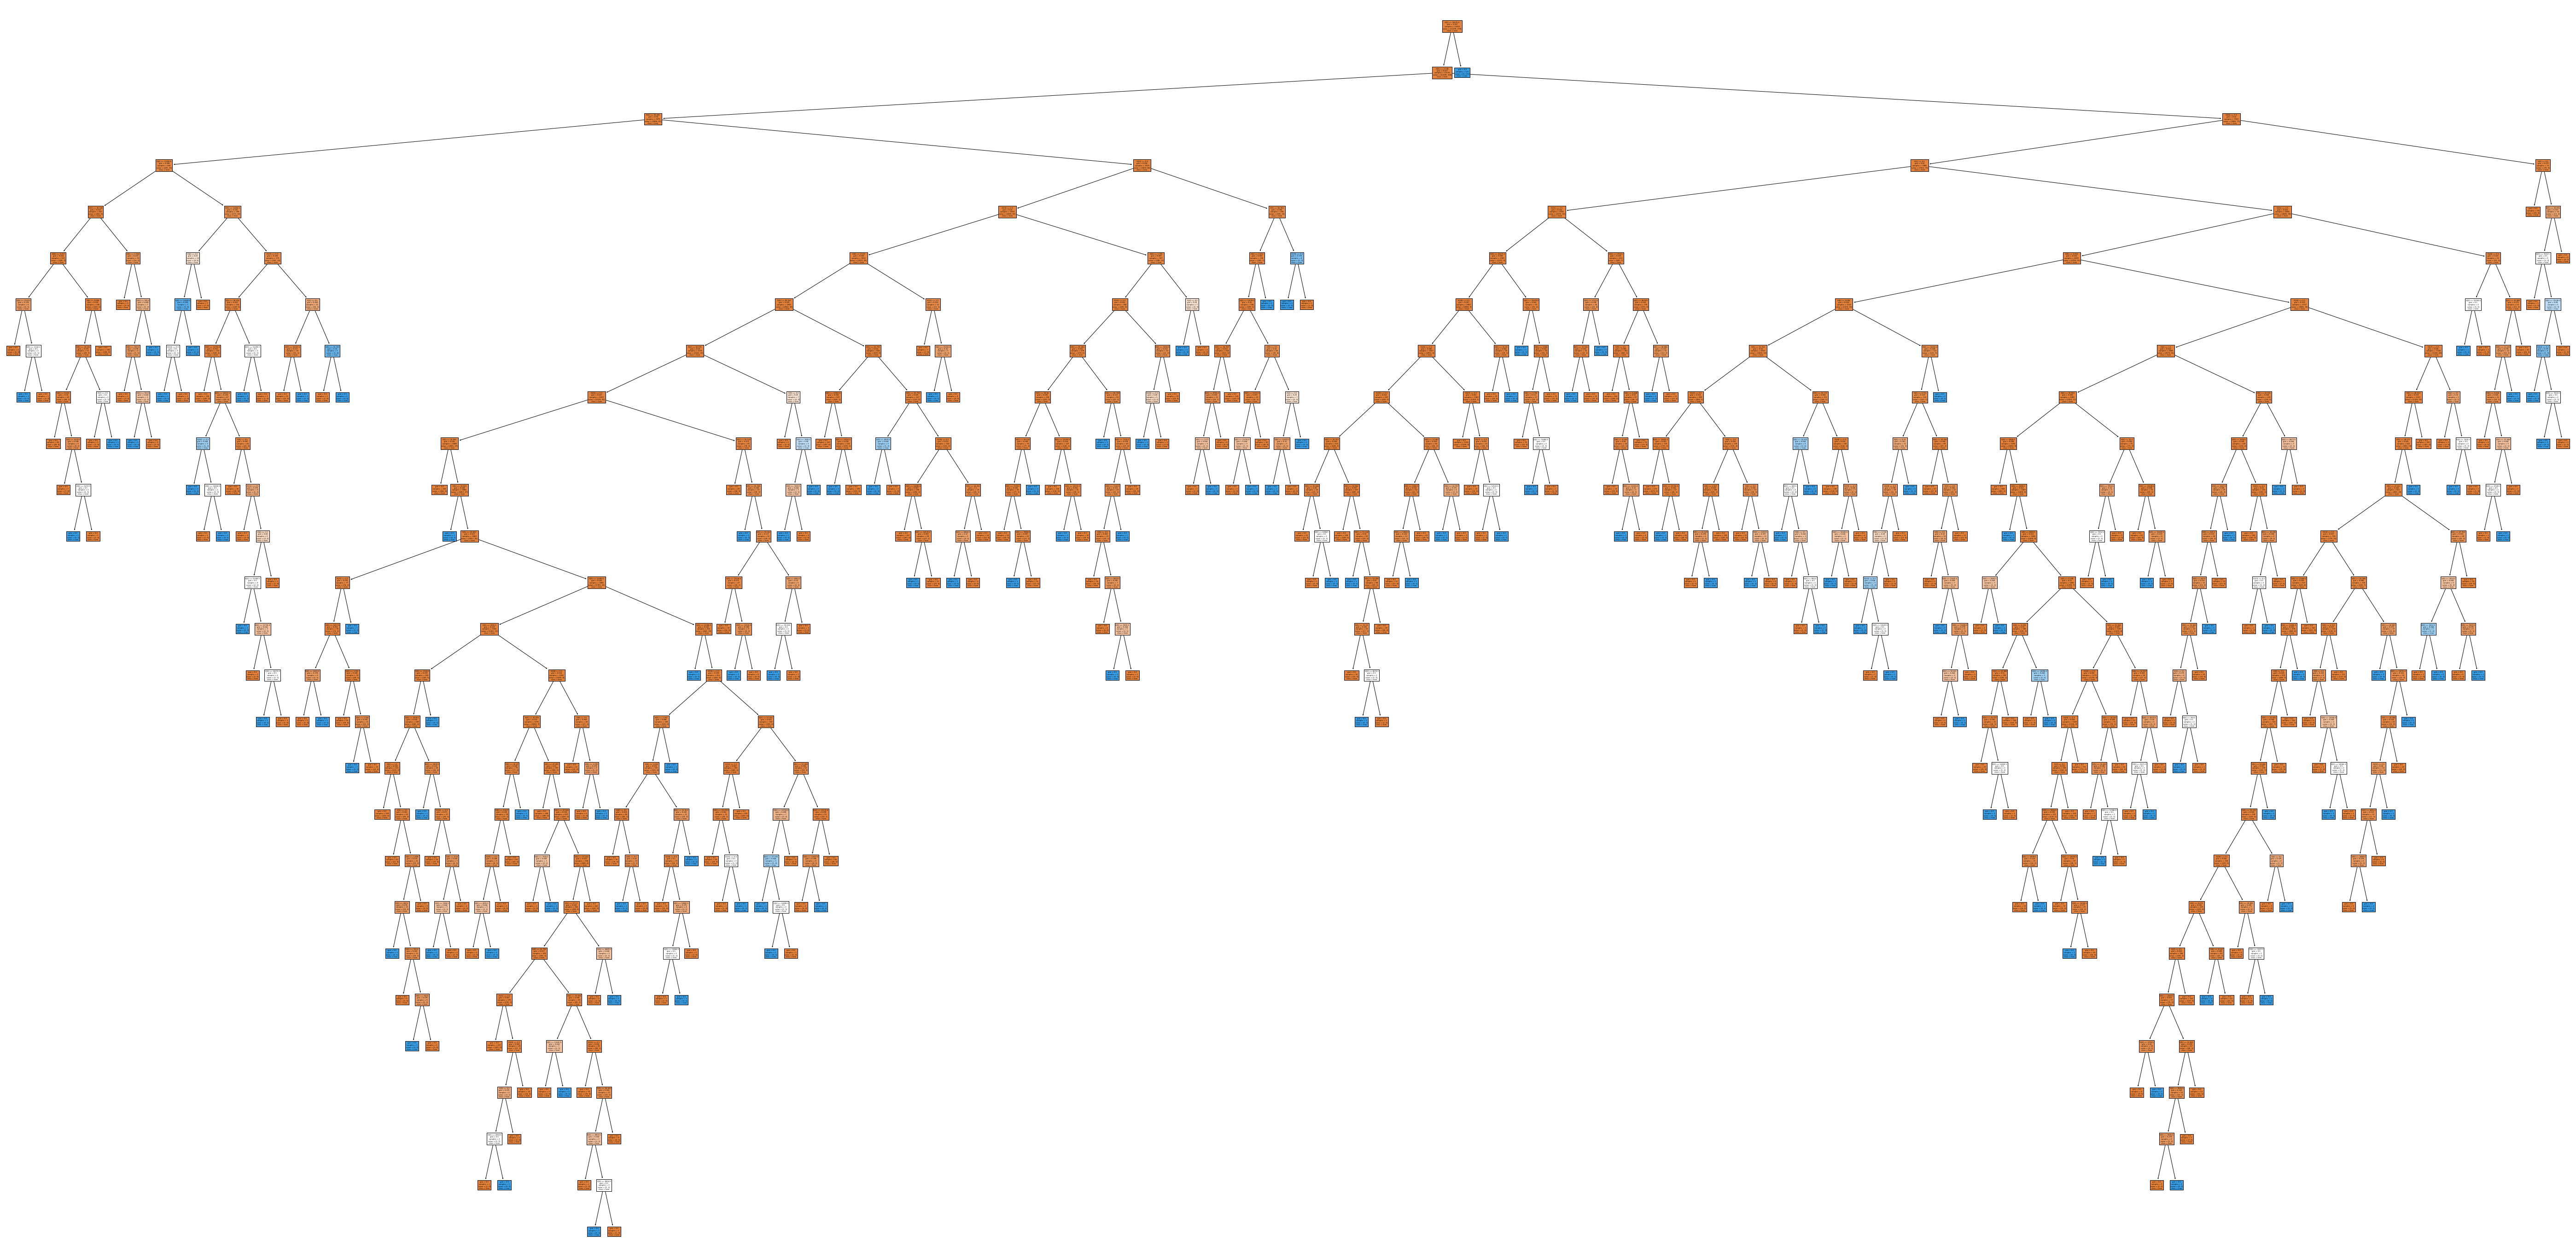

In [48]:
plt.figure(figsize=(100,50))
plot_tree(clf,
          filled=True,
          class_names=['bem','mau'],
          
          
);

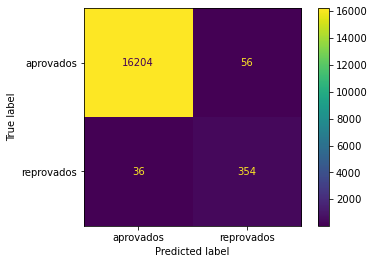

In [49]:
predict = clf.predict(X)
plot_confusion_matrix(clf,X,y,display_labels=['aprovados','reprovados'])


In [50]:
accuracy_score(y,predict)

0.9944744744744745

In [51]:
clf = DecisionTreeClassifier(random_state=7)
clf = clf.fit(x_train,y_train)

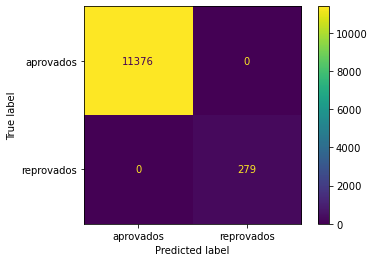

In [52]:
predict = clf.predict(x_train)
plot_confusion_matrix(clf,x_train,y_train,display_labels=['aprovados','reprovados'])


In [53]:
accuracy_score(y_train,predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [29]:
clf = DecisionTreeClassifier(random_state=7)
clf = clf.fit(x_train,y_train)

In [30]:
predict = clf.predict(x_test)

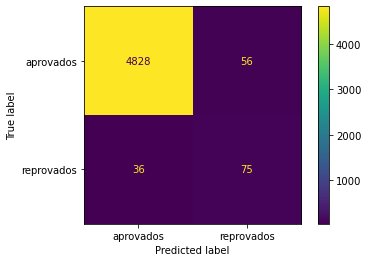

In [31]:
plot_confusion_matrix(clf,x_test,y_test,display_labels=['aprovados','reprovados']);

In [32]:
accuracy_score(y_test,predict)

0.9815815815815816

In [41]:
clf = DecisionTreeClassifier(min_samples_leaf=5,max_depth=10,random_state=123)

In [42]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

In [43]:
predict = clf.predict(X)

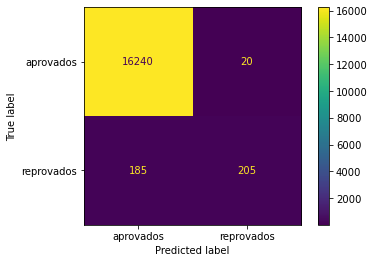

In [44]:
plot_confusion_matrix(clf,X,y,display_labels=['aprovados','reprovados']);

In [45]:
accuracy_score(y,predict)

0.9876876876876877

In [55]:
#16240 aprovados aprovados
#185 previmos aprovados mas foram reprovados
#20 falamos reprovados mas foram aprovados
#205 reprovados reprovados

In [58]:
proporcao_maus = (205+20)/(16240+185+20+205)*100
print(proporcao_maus)

1.3513513513513513


In [60]:
acuracia_todos_bons = (16240+20)/(16240+20+185+205)
print(acuracia_todos_bons)

0.9765765765765766
